linear congruential generators (LCG’s)

xn+1 ≡ a + bxn (mod m)

In [8]:
def lcg(n, seed):
    b = 1140671485
    a = 128201163
    m = 2**24
    rand = [seed]
    i=1
    while i<n:
        rand.append((a + b*rand[-1]) % m)
        i+=1
    return [ra/m for ra in rand]

 This random number generator can be shown to have period 2^24

In [9]:
import numpy as np
import pandas as pd
import matplotlib
%matplotlib inline

In [10]:
randomnumber = np.array(lcg(100, 226))

In [11]:
len(randomnumber)

100

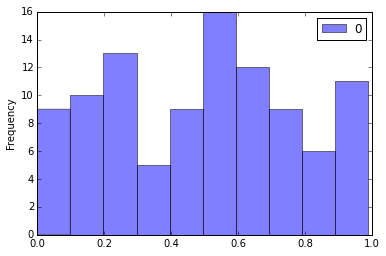

In [12]:
pd.DataFrame(randomnumber).plot.hist(alpha=0.5)

Yeah, it looks like uniform distribution, but how do you know for sure that it is unformaly distributed.
First based on law of large numbers

In [13]:
0.5 - 1/100*sum(randomnumber)

0.007005952596664422

In [14]:
import math
math.sqrt(1/12/100)

0.028867513459481287

In [15]:
(0.5 - 1/100*sum(randomnumber))/math.sqrt(1/12/100)

0.24269331705683772

cannot reject the null hypothesis that it is iid random numbers

– All MCG’s and LCG’s exhibit some positive autocorrelation. For example, in an
MCG, an extremely small value is always followed by another fairly small value.
For example in the MCG given above (b = 16807, m = 231 − 1), the frequency of
values less than 10000 is 104/2
31 ≈ 4.7×10−6
, but such a value is always followed
by a value less than 104 × 16807/2
31 ≈ 0.08 (on the (0, 1) scale)

Reservoir sampling is a family of randomized algorithms for randomly choosing a sample of k items from a list S containing n items, where n is either a very large or unknown number. Typically n is large enough that the list doesn't fit into main memory.


In [ ]:
def reservoirsampling(K, N):
    data = 
    

From (0, 1) uniform distribution to all other distribution

In [16]:
import math

In [17]:
#exponential:
#F−1(U) = −1/λ log(1 − U).

randomexp = pd.DataFrame([-10*math.log(ra) for ra in randomnumber])

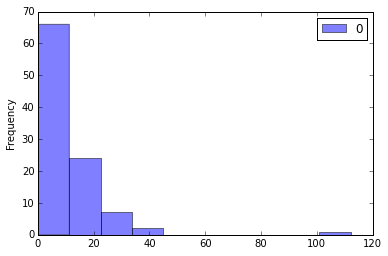

In [18]:
randomexp.plot.hist(alpha=0.5)

In [19]:
np.random.exponential(scale=1, size=None)

0.18991393493393144

In [20]:
randomexpcompare = pd.DataFrame(np.random.exponential(scale=1, size=100))

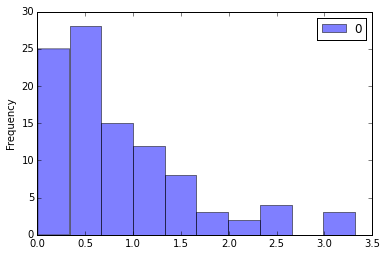

In [21]:
randomexpcompare.plot.hist(alpha=0.5)

In [22]:
randomlogit = pd.DataFrame([math.log(ra/(1-ra)) for ra in randomnumber])

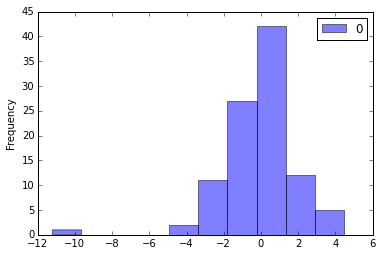

In [23]:
randomlogit.plot.hist(alpha=0.5)

In [24]:
## rejection sampling, sometimes it is hard to find the inversed CDF
float(1/8**5)

3.0517578125e-05

上来就让你自己写weighted sampling, 不能用existing function。 给两个vector, 一个是要选的数，另一个是相应的weight。 
我说根据相应的weight来replicate选择的数，再用一个uniform distribution来随即选index。
白人哥哥但是这样会有个问题，我说是阿，如果weight是小数的话就有问题，可以试着把weight vector整体乘一个很大的数，变成整数之类的。。。。

第一题可以用rejection sampling的方法
假设 samples = [1,2,3,4,5]
weights = [0.1,0.1,0.2,0.2,0.4]
可以generate一个随机i of vector index (i = 1 to 5 in this case), 
再generate一个uniform [0,1]之间的随机数 prob，
if prob <= weights[i] then output samples[i], else break, jump to next iteration. 1

In [25]:
def find_interval(x, partition):
    for i in range(len(partition)):
        if x < partition[i]:
            return i-1
    return -1
 
Interval = [0, 3, 5, 7.8, 9, 12, 13.8, 16]
for x in [-1.3, 0, 0.1, 3.2, 5, 6.2, 7.9, 10.8, 13.9, 15, 16, 16.5]:
    print(find_interval(x, Interval), end=", ")

-1, 0, 0, 1, 2, 2, 3, 4, 6, 6, -1, -1, 

In [26]:
def weighted_sample(samples, weights, N):
    res=[]
    seeds=226
    k=2
    while len(res)<N:
        index = np.array(lcg(k, seeds))[-1]*len(samples)
        for i in range(len(samples)):
            if index<i+1:
                select = samples[i]
                break     
        k+=1
        prob = np.array(lcg(k, seeds*2))[-1]
        ## reject sampling
        if prob<=weights[i]:
            res.append(samples[i])
        k+=1
    return res

samples = [1,2,3,4,5,6]
weights = [0.1,0.1,0.2,0.2,0.2,0.2]
N=5
weighted_sample(samples, weights, N)

[6, 1, 5, 4, 5]

Another rejection sampling
Rejection sampling is typically used to generate draws from complicated distributions that
arise in specialized problems (these distributions are too particular to have names). Among
the classical distributions, most can be simulated using a deterministic operation on a uniform
draw. The gamma distribution is more challenging, and cannot be handled in this way.
Therefore draws from the gamma distribution are usually generated via rejection sampling.

In [30]:
alpha = 3
beta = 1
L = math.sqrt(2*alpha - 1)
n = 0
N = 1000
seed= 226
for i in range(len(N)):
    while True:
        n+=1
        u = np.array(lcg(n, seeds))[-1]
        ## the key is to know that the following X has density proportional of f(x)
        x = alpha*(u/(1-u))**(1/L)
        g = -x + (alpha-1)*math.log(x) - math.lgamma(alpha)
        f = log(4) -alpha + (L+alpha)*log(alpha) + (L-1)*log(x) - math.lgamma(alpha) - 2*log(alpha^L + x^L)
        np.array(lcg(n, seeds))[-1]
        if (log(rand(1,1)) < g-f)
G(i) = x;
break
        

SyntaxError: unexpected EOF while parsing (<ipython-input-30-8129411d89ee>, line 7)

给你所有trip的起点和终点，如何将uber的trip从地理上分成不同的group，
从而group之间的trips尽量少，如果你只能sample其中20%的数据点你会怎么sample，
不同sample method的区别，如何保证你的模型两年后不做任何改变也还能用？

In [27]:
import random
def random_subset(iterator, K ):
    result = []
    N = 0

    for item in iterator:
        N += 1
        if len( result ) < K:
            result.append( item )
        else:
            s = int(random.random() * N)
            if s < K:
                result[ s ] = item

    return result

In [28]:
random_subset(samples, 2)

[1, 5]

在高维空间采样的时候，接受拒绝算法基本上是不可用的，见高维灾难。
简而言之就是，用简单的接受/拒绝算法，采样所需的样本量（或者说接受的概率）随空间维数增加而指数增长。
Metropolis-Hasting 主要解决的就是这个问题，使用一个会收敛到目标分布的马尔科夫链来进行采样。
你在题目里说的没有错，接受-拒绝算法可以视作一个每一步都独立取样的 Metropolis，
但是这也就是高维灾难的根源：在高维空间里，分布密度往往是稀疏的，意味着每一步独立取样的话，
绝大多数样本将被拒绝；假如使用马尔科夫链的话，则因为“跳跃分布”（也就是你所说的g(y|x)）通常是以当前态为中心，
得到相同数量的接受样本需要的采样量要低得多。当然，如果是多变量的联合分布（也可以视为分布复杂的超高维度取样），
即使用 Metropolis 也会显得不够（因为超高维情况下跳跃分布很难选取，而且很多时候联合分布用解析表示非常困难，只能用一大堆条件分布来表达），
这时候就应该选用 Gibbs Sampling，简而言之就是把 Metropolis-Hasting 中的一大步分解为 N 小步
（其中N可以是维度数，也可以是多变量中的变量数），
每一小步只根据上一大步的状态和这一大步已经选取了的维度/变量，使用维度/变量间的条件概率采样一个新变量/维度。

在Metropolis-Hastings里面提到，遇到多元分布的时候，选取初始值非常困难，
在每一个维度上都必须恰到好处。而Gibbs Sampling则是专门解决此类问题的算法，它对每一维进行同时的单独算法迭代。